In [ ]:
import pandas as pd
import requests
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import camelot
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle

1. China produces much more rice than India even though the land used for paddy production in China is less than India.
2. However, China exports a fraction of the amount of rice that India exports. In fact, India has been the top exporter for past several years.
3. I'm attempting data analysis to prove the observation right and write a story about why that maybe.
4. Data extracted from pdfs of Indian govt annual report called "Agri Statistics at a Glance".
5. Import/export data is collected from US govt website but yet to be analysed. 

## Data from Food and Agri Organization of United Nations

In [319]:
df = pd.read_csv("FAOSTAT.csv")
df

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,4,Afghanistan,5510,Production,01371,"Almonds, in shell",2011,2011,tonnes,60611.00,A,Official figure
1,QCL,Crops and livestock products,4,Afghanistan,5510,Production,01371,"Almonds, in shell",2012,2012,tonnes,62000.00,A,Official figure
2,QCL,Crops and livestock products,4,Afghanistan,5510,Production,01371,"Almonds, in shell",2013,2013,tonnes,42215.00,A,Official figure
3,QCL,Crops and livestock products,4,Afghanistan,5510,Production,01371,"Almonds, in shell",2014,2014,tonnes,27400.00,A,Official figure
4,QCL,Crops and livestock products,4,Afghanistan,5510,Production,01371,"Almonds, in shell",2015,2015,tonnes,24246.00,A,Official figure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124849,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,0111,Wheat,2020,2020,tonnes,212530.00,A,Official figure
124850,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,0111,Wheat,2021,2021,tonnes,337212.00,A,Official figure
124851,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,24212.02,Wine,2011,2011,tonnes,1750.00,E,Estimated value
124852,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,24212.02,Wine,2012,2012,tonnes,1750.00,E,Estimated value


### Most grown grains (11 year average of 2011-2021)
Maize(corn), Rice, Wheat (capitalized because that is how the data has it mentioned)

In [481]:
df.groupby("Item").Value.mean().sort_values(ascending=False).head()

Item
Sugar cane       17798919.79
Oil palm fruit    8246751.01
Maize (corn)      6412400.47
Wheat             5845683.30
Rice              5672392.52
Name: Value, dtype: float64

#### Maize

In [482]:
df_maize = df[df.Item == "Maize (corn)"]
df_maize

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
129,QCL,Crops and livestock products,4,Afghanistan,5510,Production,0112,Maize (corn),2011,2011,tonnes,300120.00,A,Official figure
130,QCL,Crops and livestock products,4,Afghanistan,5510,Production,0112,Maize (corn),2012,2012,tonnes,310000.00,A,Official figure
131,QCL,Crops and livestock products,4,Afghanistan,5510,Production,0112,Maize (corn),2013,2013,tonnes,312000.00,A,Official figure
132,QCL,Crops and livestock products,4,Afghanistan,5510,Production,0112,Maize (corn),2014,2014,tonnes,316000.00,A,Official figure
133,QCL,Crops and livestock products,4,Afghanistan,5510,Production,0112,Maize (corn),2015,2015,tonnes,316000.00,A,Official figure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124320,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,0112,Maize (corn),2017,2017,tonnes,1532572.00,A,Official figure
124321,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,0112,Maize (corn),2018,2018,tonnes,1560100.00,A,Official figure
124322,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,0112,Maize (corn),2019,2019,tonnes,773976.00,A,Official figure
124323,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,0112,Maize (corn),2020,2020,tonnes,1202347.00,A,Official figure


In [485]:
df_maize[df_maize.Year == 2021].Value.sum()

1210235135.14

In [323]:
df_maize.groupby('Year').Area.count().to_csv('maize_countries.csv')

In [324]:
df_maize.groupby('Year').Value.mean().to_csv('maize_production.csv')

In [325]:
df_m1 = pd.read_csv('maize_countries.csv')
df_m1

,Year,Area
0,2011,164
1,2012,165
2,2013,165
3,2014,165
4,2015,165
5,2016,165
6,2017,165
7,2018,170
8,2019,170
9,2020,171


In [326]:
df_m2 = pd.read_csv('maize_production.csv')
df_m2

,Year,Value
0,2011,5413138.48
1,2012,5306355.78
2,2013,6162418.69
3,2014,6307382.76
4,2015,6387218.24
5,2016,6810477.54
6,2017,6907300.55
7,2018,6612777.44
8,2019,6691866.78
9,2020,6801155.29


In [327]:
maize_over_years = df_m1.set_index('Year').join(df_m2.set_index('Year'))
maize_over_years

,Area,Value
Year,,
2011,164,5413138.48
2012,165,5306355.78
2013,165,6162418.69
2014,165,6307382.76
2015,165,6387218.24
2016,165,6810477.54
2017,165,6907300.55
2018,170,6612777.44
2019,170,6691866.78


#### Rice

In [328]:
rice = df[df.Item == "Rice"]
rice

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
374,QCL,Crops and livestock products,4,Afghanistan,5510,Production,0113,Rice,2011,2011,tonnes,672000.00,A,Official figure
375,QCL,Crops and livestock products,4,Afghanistan,5510,Production,0113,Rice,2012,2012,tonnes,500000.00,A,Official figure
376,QCL,Crops and livestock products,4,Afghanistan,5510,Production,0113,Rice,2013,2013,tonnes,512094.00,A,Official figure
377,QCL,Crops and livestock products,4,Afghanistan,5510,Production,0113,Rice,2014,2014,tonnes,537000.00,A,Official figure
378,QCL,Crops and livestock products,4,Afghanistan,5510,Production,0113,Rice,2015,2015,tonnes,410000.00,A,Official figure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124683,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,0113,Rice,2017,2017,tonnes,1326.90,I,Imputed value
124684,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,0113,Rice,2018,2018,tonnes,1342.47,I,Imputed value
124685,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,0113,Rice,2019,2019,tonnes,1134.00,A,Official figure
124686,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,0113,Rice,2020,2020,tonnes,750.00,E,Estimated value


In [491]:
rice[rice.Year == 2021].Value.sum()

787293867.4100001

In [329]:
rice.groupby('Year').Area.count().to_csv('rice_countries.csv')

In [330]:
rice.groupby('Year').Value.mean().to_csv('rice_production.csv')

In [331]:
df_r1 = pd.read_csv('rice_countries.csv')
df_r1

,Year,Area
0,2011,124
1,2012,125
2,2013,125
3,2014,125
4,2015,125
5,2016,125
6,2017,125
7,2018,143
8,2019,143
9,2020,143


In [332]:
df_r2 = pd.read_csv('rice_production.csv')
df_r2

,Year,Value
0,2011,5802176.27
1,2012,5821445.31
2,2013,5854163.45
3,2014,5851336.41
4,2015,5863186.95
5,2016,5896714.14
6,2017,6008961.89
7,2018,5321856.51
8,2019,5267737.07
9,2020,5379216.46


In [333]:
rice_over_years = df_r1.set_index('Year').join(df_r2.set_index('Year'))
rice_over_years

,Area,Value
Year,,
2011,124,5802176.27
2012,125,5821445.31
2013,125,5854163.45
2014,125,5851336.41
2015,125,5863186.95
2016,125,5896714.14
2017,125,6008961.89
2018,143,5321856.51
2019,143,5267737.07


#### Wheat

In [334]:
wheat = df[df.Item == "Wheat"]
wheat

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
472,QCL,Crops and livestock products,4,Afghanistan,5510,Production,0111,Wheat,2011,2011,tonnes,3388000.00,A,Official figure
473,QCL,Crops and livestock products,4,Afghanistan,5510,Production,0111,Wheat,2012,2012,tonnes,5050000.00,A,Official figure
474,QCL,Crops and livestock products,4,Afghanistan,5510,Production,0111,Wheat,2013,2013,tonnes,5169235.00,A,Official figure
475,QCL,Crops and livestock products,4,Afghanistan,5510,Production,0111,Wheat,2014,2014,tonnes,5370259.00,A,Official figure
476,QCL,Crops and livestock products,4,Afghanistan,5510,Production,0111,Wheat,2015,2015,tonnes,4673040.00,A,Official figure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124846,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,0111,Wheat,2017,2017,tonnes,38715.00,A,Official figure
124847,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,0111,Wheat,2018,2018,tonnes,45000.00,E,Estimated value
124848,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,0111,Wheat,2019,2019,tonnes,94685.00,A,Official figure
124849,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,0111,Wheat,2020,2020,tonnes,212530.00,A,Official figure


In [492]:
wheat[wheat.Year == 2021].Value.sum()

770877072.8800001

In [335]:
wheat.groupby('Year').Area.count().to_csv('wheat_countries.csv')

In [336]:
wheat.groupby('Year').Value.mean().to_csv('wheat_production.csv')

In [337]:
df_w1 = pd.read_csv('wheat_countries.csv')
df_w1

,Year,Area
0,2011,125
1,2012,126
2,2013,126
3,2014,126
4,2015,126
5,2016,126
6,2017,126
7,2018,126
8,2019,126
9,2020,126


In [338]:
df_w2 = pd.read_csv('wheat_production.csv')
df_w2

,Year,Value
0,2011,5575186.94
1,2012,5347118.33
2,2013,5636265.62
3,2014,5783791.75
4,2015,5887660.86
5,2016,5939940.34
6,2017,6129408.70
7,2018,5811393.53
8,2019,6063994.71
9,2020,6007536.73


In [339]:
wheat_over_years = df_w1.set_index('Year').join(df_w2.set_index('Year'))
wheat_over_years

,Area,Value
Year,,
2011,125,5575186.94
2012,126,5347118.33
2013,126,5636265.62
2014,126,5783791.75
2015,126,5887660.86
2016,126,5939940.34
2017,126,6129408.70
2018,126,5811393.53
2019,126,6063994.71


In [340]:
wheat_over_years = wheat_over_years.reset_index()
wheat_over_years

,Year,Area,Value
0,2011,125,5575186.94
1,2012,126,5347118.33
2,2013,126,5636265.62
3,2014,126,5783791.75
4,2015,126,5887660.86
5,2016,126,5939940.34
6,2017,126,6129408.70
7,2018,126,5811393.53
8,2019,126,6063994.71
9,2020,126,6007536.73


In [341]:
rice_over_years = rice_over_years.reset_index()

In [342]:
maize_over_years = maize_over_years.reset_index()

#### Rice, wheat, maize together

In [355]:
rwm_over_years = rice_over_years.merge(wheat_over_years, on='Year', how='left').merge(maize_over_years, on='Year', how='left')
rwm_over_years = rwm_over_years.round(0)
rwm_over_years

,Year,Area_x,Value_x,Area_y,Value_y,Area,Value
0,2011,124,5802176.00,125,5575187.00,164,5413138.00
1,2012,125,5821445.00,126,5347118.00,165,5306356.00
2,2013,125,5854163.00,126,5636266.00,165,6162419.00
3,2014,125,5851336.00,126,5783792.00,165,6307383.00
4,2015,125,5863187.00,126,5887661.00,165,6387218.00
5,2016,125,5896714.00,126,5939940.00,165,6810478.00
6,2017,125,6008962.00,126,6129409.00,165,6907301.00
7,2018,143,5321857.00,126,5811394.00,170,6612777.00
8,2019,143,5267737.00,126,6063995.00,170,6691867.00
9,2020,143,5379216.00,126,6007537.00,171,6801155.00


In [366]:
rwm_over_years['Value_x'] = rwm_over_years['Value_x'] / 1000000

In [368]:
rwm_over_years['Value_y'] = rwm_over_years['Value_y'] / 1000000

In [369]:
rwm_over_years['Value'] = rwm_over_years['Value'] / 1000000

In [372]:
rwm_over_years = rwm_over_years.drop(columns=['rice_p_in_million', 'rice_area'])
rwm_over_years

,Year,Area_x,Value_x,Area_y,Value_y,Area,Value
0,2011,124,5.80,125,5.58,164,5.41
1,2012,125,5.82,126,5.35,165,5.31
2,2013,125,5.85,126,5.64,165,6.16
3,2014,125,5.85,126,5.78,165,6.31
4,2015,125,5.86,126,5.89,165,6.39
5,2016,125,5.90,126,5.94,165,6.81
6,2017,125,6.01,126,6.13,165,6.91
7,2018,143,5.32,126,5.81,170,6.61
8,2019,143,5.27,126,6.06,170,6.69
9,2020,143,5.38,126,6.01,171,6.80


Renaming columns

In [374]:
rwm_over_years.columns = rwm_over_years.columns.str.replace("Area_x", "rice_countries").str.replace("Value_x", "rice_in_mil").str.replace("Area_y", "wheat_countries").str.replace("Value_y", "wheat_in_mil").str.replace("Value", "maize_in_mil").str.replace("Area", "maize_countries")

In [394]:
rwm_over_years.rice_in_mil = rwm_over_years.rice_in_mil.round(2)

In [411]:
rwm_over_years.wheat_in_mil = rwm_over_years.wheat_in_mil.round(2)

In [412]:
rwm_over_years.maize_in_mil = rwm_over_years.maize_in_mil.round(2)

In [413]:
rwm_over_years.to_csv('rwm_11_years.csv', index=False)

In [414]:
rwm_over_years

,Year,rice_countries,rice_in_mil,wheat_countries,wheat_in_mil,maize_countries,maize_in_mil
0,2011,124,5.80,125,5.58,164,5.41
1,2012,125,5.82,126,5.35,165,5.31
2,2013,125,5.85,126,5.64,165,6.16
3,2014,125,5.85,126,5.78,165,6.31
4,2015,125,5.86,126,5.89,165,6.39
5,2016,125,5.90,126,5.94,165,6.81
6,2017,125,6.01,126,6.13,165,6.91
7,2018,143,5.32,126,5.81,170,6.61
8,2019,143,5.27,126,6.06,170,6.69
9,2020,143,5.38,126,6.01,171,6.80


In [415]:
pd.read_csv('rwm_11_years.csv', usecols=['Year','rice_countries', 'rice_in_mil']).to_csv('rice_11_years.csv', index=False)

In [416]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [417]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [418]:
%%R


require('ggplot2')
require('readr')
require('extrafont')
require('dplyr')
require('reshape2')
require('tidyverse')

R[write to console]: Loading required package: reshape2



* CANNOT USE THIS BECAUSE REALIZED MISTAKE: IF A NEW COUNTRY IS ADDED TO THE LIST, IT'S SMALL SCALE PRODUCTION OF RICE WILL AFFECT THE AVERAGE (eg,: average of 120 countries in 2011 will be more than average of 143 countries in 2021 because small-scale production countries got added)

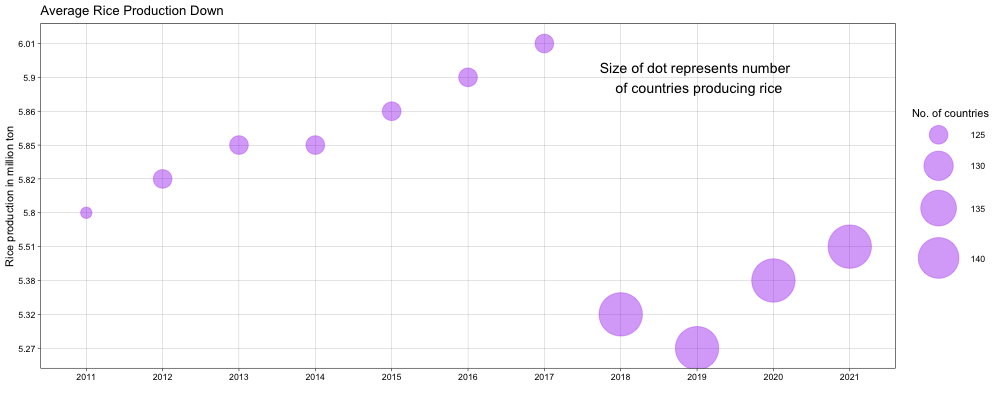

In [452]:
%%R -i rwm_over_years -w 1000 -h 400

rwm_over_years
plt <- ggplot(rwm_over_years, aes(x=factor(Year), y=factor(rice_in_mil), size=rice_countries)) +
    geom_point(alpha=0.4, color="purple") + 
    scale_size(range = c(5, 20), name="No. of countries") +
    annotate("text", label="Size of dot represents number \n of countries producing rice", x=9, y=9, color='black', size=5) + 
     labs(x=" ", y="Rice production in million ton", title="Average Rice Production Down") + theme_linedraw()

plt

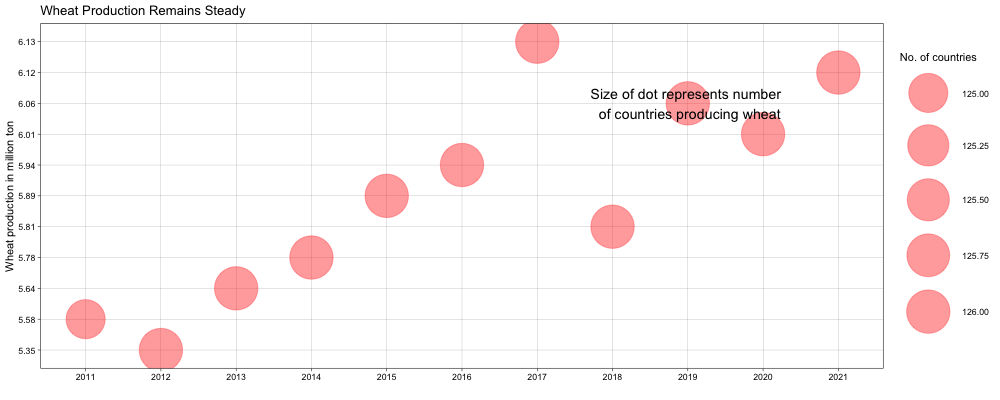

In [451]:
%%R -i rwm_over_years -w 1000 -h 400

# EXAMPLE R CELL
rwm_over_years
plt <- ggplot(rwm_over_years) +
    geom_point(aes(x=factor(Year), y=factor(wheat_in_mil), size=wheat_countries), alpha=0.4, color="red") +
    scale_size(range = c(18, 20), name="No. of countries") + 
    annotate("text", label="Size of dot represents number \n of countries producing wheat", x=9, y=9, color='black', size=5) + 
     labs(x=" ", y="Wheat production in million ton", title="Wheat Production Remains Steady") + theme_linedraw()

plt

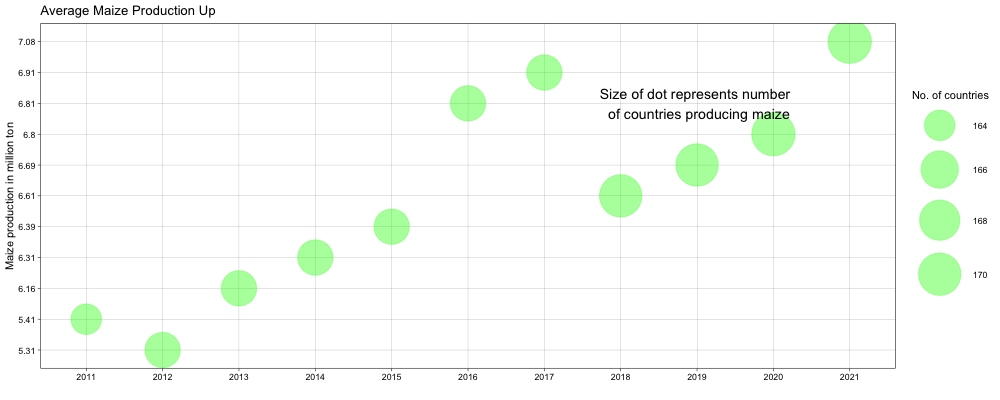

In [450]:
%%R -i rwm_over_years -w 1000 -h 400

# EXAMPLE R CELL
rwm_over_years
plt <- ggplot(rwm_over_years) +
    geom_point(aes(x=factor(Year), y=factor(maize_in_mil), size=maize_countries), alpha=0.4, color="green") +
    scale_size(range = c(14, 20), name="No. of countries") + 
    annotate("text", label="Size of dot represents number \n of countries producing maize", x=9, y=9, color='black', size=5) + 
     labs(x=" ", y="Maize production in million ton", title="Average Maize Production Up") + theme_linedraw()

plt

In [101]:
df.groupby("Item").Area.count().sort_values(ascending=False).head(20)

Item
Other vegetables, fresh n.e.c.                                  2095
Tomatoes                                                        1844
Maize (corn)                                                    1836
Other fruits, n.e.c.                                            1756
Potatoes                                                        1742
Cabbages                                                        1639
Beer of barley, malted                                          1630
Onions and shallots, dry (excluding dehydrated)                 1568
Unmanufactured tobacco                                          1494
Cucumbers and gherkins                                          1484
Bananas                                                         1471
Rice                                                            1446
Carrots and turnips                                             1426
Chillies and peppers, green (Capsicum spp. and Pimenta spp.)    1392
Wheat                        

## Rice

#### Production of rice around the world

In [ ]:
df[df.Item == "Rice"]

In [59]:
rice_df = df[df.Item == "Rice"]
rice_df = rice_df.reset_index(drop='index')
rice_df

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,4,Afghanistan,5510,Production,0113,Rice,2011,2011,tonnes,672000.00,A,Official figure
1,QCL,Crops and livestock products,4,Afghanistan,5510,Production,0113,Rice,2012,2012,tonnes,500000.00,A,Official figure
2,QCL,Crops and livestock products,4,Afghanistan,5510,Production,0113,Rice,2013,2013,tonnes,512094.00,A,Official figure
3,QCL,Crops and livestock products,4,Afghanistan,5510,Production,0113,Rice,2014,2014,tonnes,537000.00,A,Official figure
4,QCL,Crops and livestock products,4,Afghanistan,5510,Production,0113,Rice,2015,2015,tonnes,410000.00,A,Official figure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,0113,Rice,2017,2017,tonnes,1326.90,I,Imputed value
1442,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,0113,Rice,2018,2018,tonnes,1342.47,I,Imputed value
1443,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,0113,Rice,2019,2019,tonnes,1134.00,A,Official figure
1444,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,0113,Rice,2020,2020,tonnes,750.00,E,Estimated value


In [60]:
rice_df.groupby('Area').Value.sum().sort_values(ascending=False).head(10).to_csv('new_rice.csv')

In [61]:
rice_df.groupby('Area').Value.mean().sort_values(ascending=False).head(10).to_csv('avg_rice_production.csv')

## Rice harvest area 2020
* Downloaded rice harvest area for 11 years for top 10 countries from FOAUN website directly.
* Then filtered it for 2020

In [277]:
harvest_df = pd.read_csv('FAOSTAT_rice_harvest.csv')
harvest_df

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,50,Bangladesh,5312,Area harvested,113,Rice,2011,2011,ha,11528000,A,Official figure
1,QCL,Crops and livestock products,50,Bangladesh,5312,Area harvested,113,Rice,2012,2012,ha,11423000,A,Official figure
2,QCL,Crops and livestock products,50,Bangladesh,5312,Area harvested,113,Rice,2013,2013,ha,11372000,A,Official figure
3,QCL,Crops and livestock products,50,Bangladesh,5312,Area harvested,113,Rice,2014,2014,ha,11415642,A,Official figure
4,QCL,Crops and livestock products,50,Bangladesh,5312,Area harvested,113,Rice,2015,2015,ha,11381221,A,Official figure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,QCL,Crops and livestock products,704,Viet Nam,5312,Area harvested,113,Rice,2017,2017,ha,7708534,A,Official figure
106,QCL,Crops and livestock products,704,Viet Nam,5312,Area harvested,113,Rice,2018,2018,ha,7570741,A,Official figure
107,QCL,Crops and livestock products,704,Viet Nam,5312,Area harvested,113,Rice,2019,2019,ha,7451544,A,Official figure
108,QCL,Crops and livestock products,704,Viet Nam,5312,Area harvested,113,Rice,2020,2020,ha,7222403,A,Official figure


In [278]:
harvest_df[harvest_df.Year == 2020].to_csv("rice_harvest_area_2020.csv")

In [279]:
df_harvest_area = pd.read_csv("rice_harvest_area_2020.csv", usecols=["Area", "Value"])
df_harvest_area

,Area,Value
0,Bangladesh,11417745
1,Brazil,1677705
2,"China, mainland",30080000
3,India,45070000
4,Indonesia,10657275
5,Japan,1462000
6,Myanmar,6829904
7,Philippines,4718896
8,Thailand,10401653
9,Viet Nam,7222403


## Total agricultural land 2020
* Downloaded total agriculture land for top 10 countries for 11 years from FOAUN website directly.
* Then filtered it for 2020.

In [280]:
total_agricultural_land = pd.read_csv('FAOSTAT_agri_land_2020.csv', usecols=["Area", "Value"])

In [281]:
total_agricultural_land['value'] = total_agricultural_land.Value * 1000
total_agricultural_land

,Area,Value,value
0,Bangladesh,9901.00,9901000.00
1,Brazil,236878.80,236878801.00
2,"China, mainland",527714.00,527714000.00
3,India,179045.08,179045076.40
4,Indonesia,62300.00,62300000.00
5,Japan,4372.00,4372000.00
6,Myanmar,13008.00,13008000.00
7,Philippines,12675.00,12675000.00
8,Thailand,23010.00,23010000.00
9,Viet Nam,12360.00,12360000.00


In [282]:
total_agricultural_land = total_agricultural_land.drop(columns='Value')
total_agricultural_land

,Area,value
0,Bangladesh,9901000.00
1,Brazil,236878801.00
2,"China, mainland",527714000.00
3,India,179045076.40
4,Indonesia,62300000.00
5,Japan,4372000.00
6,Myanmar,13008000.00
7,Philippines,12675000.00
8,Thailand,23010000.00
9,Viet Nam,12360000.00


In [283]:
total_agricultural_land.columns = total_agricultural_land.columns.str.replace("value", "total_agri_land_2020")

In [284]:
land_total_vs_rice = total_agricultural_land.set_index('Area').join(df_harvest_area.set_index('Area'))

In [285]:
land_total_vs_rice.columns = land_total_vs_rice.columns.str.replace("Area", "country").str.replace("Value", "rice_harvest_avg")

In [286]:
land_total_vs_rice.to_csv('total_vs_rice_land.csv')

*Had to drop Bangladesh due to conflicting numbers.* 
*Total agri land was smaller than land use for paddy harvest.*
*The total agri land values are imputed values while harvest are official figures.*

In [287]:
total_vs_rice = land_total_vs_rice.sort_values(by='total_agri_land_2020', ascending=False).head(5)
total_vs_rice

,total_agri_land_2020,rice_harvest_avg
Area,,
"China, mainland",527714000.00,30080000
Brazil,236878801.00,1677705
India,179045076.40,45070000
Indonesia,62300000.00,10657275
Thailand,23010000.00,10401653


## Delete rice land from total land for waffle chart. New column of subtracted value.

In [288]:
total_vs_rice['for_waffle'] = total_vs_rice['total_agri_land_2020'] - total_vs_rice['rice_harvest_avg']

In [289]:
total_vs_rice_n = total_vs_rice.transpose()
data = total_vs_rice_n.drop(labels='total_agri_land_2020')
data

Area,"China, mainland",Brazil,India,Indonesia,Thailand
rice_harvest_avg,30080000.00,1677705.00,45070000.00,10657275.00,10401653.00
for_waffle,497634000.00,235201096.00,133975076.40,51642725.00,12608347.00


In [ ]:
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        311: {
            'values': data['China, mainland'] / 10000000,  # Convert actual number to a reasonable block number
            'colors': ['#76ca4e', '#82665c'],
            'icons': ['wheat-awn', 'table-cells'],
            'font_size':13,
            'icon_style':'solid',
            'icon_legend': True,
            'legend': {
                'labels': ['rice harvest land (Ha)', 'rest of agri land (Ha)'], 
                'loc': 'upper left', 
                'bbox_to_anchor': (1.1, 1.57)
                },
            'title': {'label': 'China', 'loc': 'left', 'fontsize': 12},
        },
        312: {
            'values': data['Brazil'] / 10000000,
            'colors': ['#76ca4e', '#82665c'],
            'icons': ['wheat-awn', 'table-cells'],
            'font_size':13,
            'icon_style':'solid',
            'icon_legend': True,
            'title': {'label': 'Brazil', 'loc': 'left', 'fontsize': 12}
        },
        313: {
            'values': data['India'] / 10000000,
            'colors': ['#76ca4e', '#82665c'],
            'icons': ['wheat-awn', 'table-cells'],
            'font_size':13,
            'icon_style':'solid',
            'icon_legend': True,
            'title': {'label': 'India', 'loc': 'left', 'fontsize': 12}
        }

    },
     rows=5,  # Outside parameter applied to all subplots, same as below
     cmap_name="Accent",  # Change color with cmap
     block_arranging_style='normal',
     rounding_rule='ceil',  # Change rounding rule, so value less than 1000 will still have at least 1 block
     figsize=(8, 5)
)
fig.suptitle('Land Used For Paddy vs Total Agri Land in 2020', fontsize=14, fontweight='bold', x=0.27)
fig.supxlabel('1 block = 10mn Hectare land', fontsize=8, x=0.25)
fig.set_facecolor('#EEEDE7')

fig.text(
    x=0.32,
    y=0.2,
    s="Largest exporter",
    ha="center",
    va="center",
    rotation=20,
    fontsize=13,
    color='red',
    alpha=0.5,
    bbox={
        'boxstyle': 'square', 
        'lw': 3, 
        'ec': 'red', 
        'fc': (0.9, 0.9, 0.9, 0.5), 
        'alpha': 0.3
    }
)

fig.text(
    x=0.48,
    y=0.7,
    s="Largest producer",
    ha="center",
    va="center",
    rotation=20,
    fontsize=13,
    color='red',
    alpha=0.5,
    bbox={
        'boxstyle': 'square', 
        'lw': 3, 
        'ec': 'red', 
        'fc': (0.9, 0.9, 0.9, 0.5), 
        'alpha': 0.3
    }
)

fig.text(
    x=0.31,
    y=0.71,
    s="497mn",
    ha="center",
    va="center",
    rotation=0,
    fontsize=10,
    color='black',
    alpha=1,
)

fig.text(
    x=-0.013,
    y=0.65,
    s="30mn",
    ha="center",
    va="center",
    rotation=0,
    fontsize=10,
    color='black',
    alpha=1,
)

fig.text(
    x=-0.013,
    y=0.38,
    s="2mn",
    ha="center",
    va="center",
    rotation=0,
    fontsize=10,
    color='black',
    alpha=1,
)

fig.text(
    x=0.17,
    y=0.47,
    s="235mn",
    ha="center",
    va="center",
    rotation=0,
    fontsize=10,
    color='black',
    alpha=1,
)

fig.text(
    x=0.15,
    y=0.19,
    s="133mn",
    ha="center",
    va="center",
    rotation=0,
    fontsize=10,
    color='black',
    alpha=1,
)

fig.text(
    x=-0.013,
    y=0.10,
    s="44mn",
    ha="center",
    va="center",
    rotation=0,
    fontsize=10,
    color='black',
    alpha=1,
)

plt.show()

### USDA data on global rice export share

In [92]:
df2 = pd.read_csv("share-of-global-rice-exports.csv", names=['country', 'global-rice-export-pct-share'])
df2 = df2.sort_values(by='global-rice-export-pct-share', ascending=False).reset_index(drop=True)
df2

,country,global-rice-export-pct-share
0,India,37.10
1,Thailand,12.70
2,Vietnam,12.60
3,Pakistan,8.60
4,United States,5.50
5,China,4.60
6,Myanmar,4.30
7,Cambodia,3.20


In [93]:
df2['global-rice-export-pct-share'].sum()

88.6

* Used this in Datawrapper

In [170]:
df2.to_csv('share-of-global-rice-exports.csv', index=False)

embed codes

<iframe title="Top 10 Rice Producing Countries (2011-21)" aria-label="Bar Chart" id="datawrapper-chart-gZQ9E" src="https://datawrapper.dwcdn.net/gZQ9E/1/" scrolling="no" frameborder="0" style="width: 0; min-width: 100% !important; border: none;" height="419" data-external="1"></iframe><script type="text/javascript">!function(){"use strict";window.addEventListener("message",(function(e){if(void 0!==e.data["datawrapper-height"]){var t=document.querySelectorAll("iframe");for(var a in e.data["datawrapper-height"])for(var r=0;r<t.length;r++){if(t[r].contentWindow===e.source)t[r].style.height=e.data["datawrapper-height"][a]+"px"}}}))}();
</script>
    
<iframe title="Top 10 Rice Producing Countries' Area For Paddy Harvesting" aria-label="Bar Chart" id="datawrapper-chart-9z1is" src="https://datawrapper.dwcdn.net/9z1is/1/" scrolling="no" frameborder="0" style="width: 0; min-width: 100% !important; border: none;" height="402" data-external="1"></iframe><script type="text/javascript">!function(){"use strict";window.addEventListener("message",(function(e){if(void 0!==e.data["datawrapper-height"]){var t=document.querySelectorAll("iframe");for(var a in e.data["datawrapper-height"])for(var r=0;r<t.length;r++){if(t[r].contentWindow===e.source)t[r].style.height=e.data["datawrapper-height"][a]+"px"}}}))}();
</script>
    
<iframe title="Percent Share of Global Rice Exports" aria-label="Bar Chart" id="datawrapper-chart-pgbKO" src="https://datawrapper.dwcdn.net/pgbKO/1/" scrolling="no" frameborder="0" style="width: 0; min-width: 100% !important; border: none;" height="376" data-external="1"></iframe><script type="text/javascript">!function(){"use strict";window.addEventListener("message",(function(e){if(void 0!==e.data["datawrapper-height"]){var t=document.querySelectorAll("iframe");for(var a in e.data["datawrapper-height"])for(var r=0;r<t.length;r++){if(t[r].contentWindow===e.source)t[r].style.height=e.data["datawrapper-height"][a]+"px"}}}))}();
</script>
    
<iframe title="Total Agricultural Land v/s Land Harvested for Paddy" aria-label="Grouped Bars" id="datawrapper-chart-dIW1U" src="https://datawrapper.dwcdn.net/dIW1U/2/" scrolling="no" frameborder="0" style="width: 0; min-width: 100% !important; border: none;" height="925" data-external="1"></iframe><script type="text/javascript">!function(){"use strict";window.addEventListener("message",(function(e){if(void 0!==e.data["datawrapper-height"]){var t=document.querySelectorAll("iframe");for(var a in e.data["datawrapper-height"])for(var r=0;r<t.length;r++){if(t[r].contentWindow===e.source)t[r].style.height=e.data["datawrapper-height"][a]+"px"}}}))}();
</script>

In [ ]:
df_siena.type_detail.count()

geom_dotplot()

grom